#Building Movie Recommendation---->Netflix Shows

In [61]:
import nltk

In [62]:
!pip install plotly


[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
#import necessary libraries
import pandas as pd   #pandas for data amnupulation and analysis
import plotly.express as px #plotly express for interactive 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk #natural language toolkit for NLP
from nltk.corpus import stopwords
from nltk.corpus import wordnet #wordnet for lexical database


In [64]:
stopwords

<WordListCorpusReader in 'C:\\Users\\pasal\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [65]:
#download necessary nltk resources
nltk.download('stopwords') #stopwords data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pasal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
nltk.download('punkt')
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pasal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pasal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [67]:
data=pd.read_csv('netflix_titles.csv')

In [95]:
# check the count of unique occurences of release year 
ry=data['release_year'].value_counts().reset_index()
ry

,release_year,count
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
...,...,...
69,1959,1
70,1925,1
71,1961,1
72,1947,1


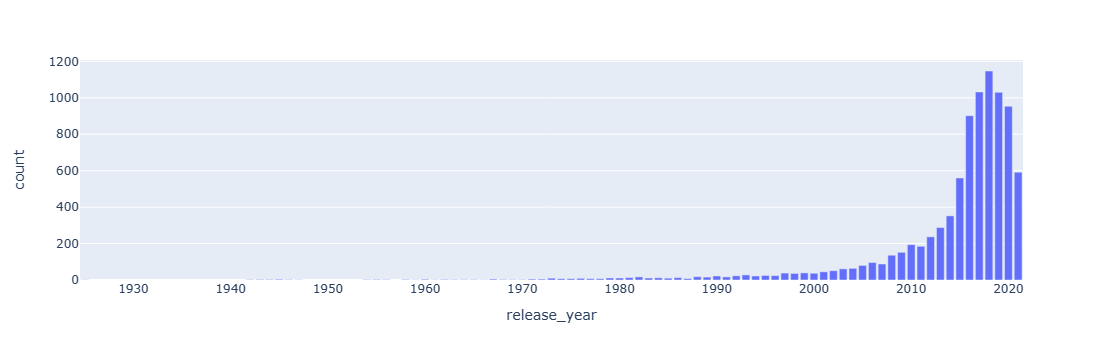

In [96]:
px.bar(ry,x='release_year',y='count')

In [97]:
data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [98]:
df1=data[['type','release_year']]  #extracting both coumns
df1
#for our easy approach we are renaming release_year
df1=df1.rename(columns={'release_year':'Release_year'})
df1
#we group the data

,type,Release_year
0,Movie,2020
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8802,Movie,2007
8803,TV Show,2018
8804,Movie,2009
8805,Movie,2006


In [99]:
df1=df1.groupby(['Release_year','type']).size().reset_index(name='Total content')

In [100]:
df1

,Release_year,type,Total content
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


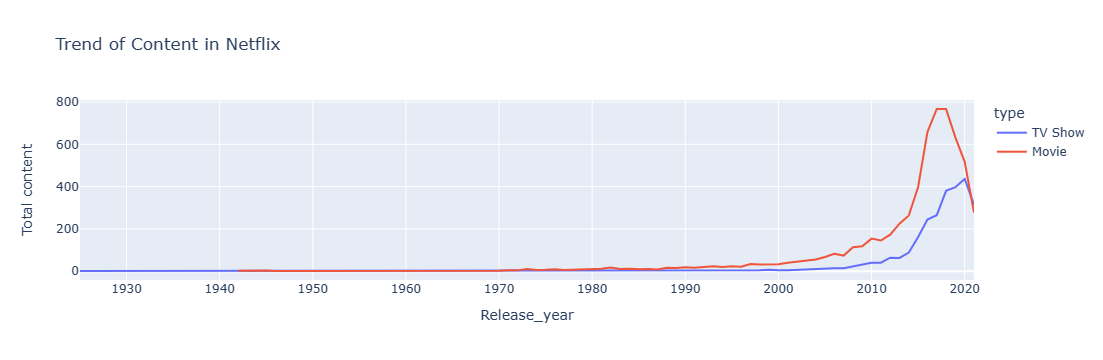

In [106]:
df2=df1[df1['Release_year']>=1900]
df2
#then we can check distribution
px.line(df2,x='Release_year',
       y='Total content',
       color='type',
       title='Trend of Content in Netflix')

In [110]:
data['country'].value_counts()
#we can check the top countries
top_countries=data['country'].value_counts().reset_index().head()
#top5 as head() is default
top_countries

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


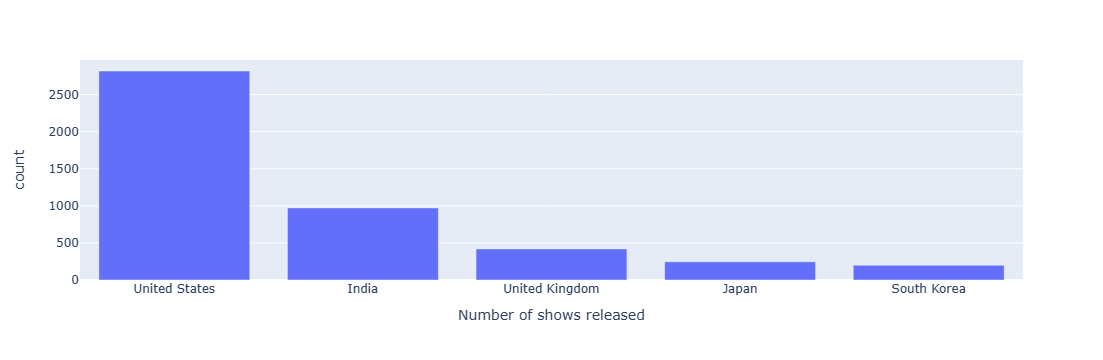

In [111]:
#create a barchart to get the top countries values
px.bar(top_countries,x='country',y='count',
      labels={'index':'country',
            'country':'Number of shows released'})

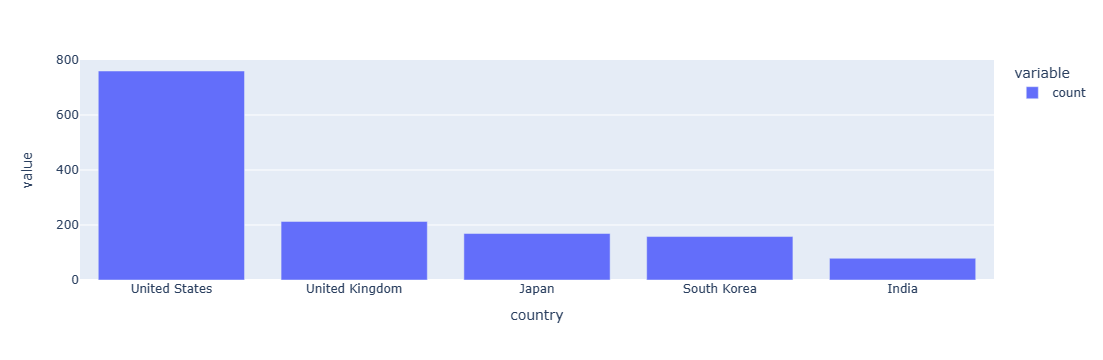

In [121]:
tv=data[data['type']=='TV Show']
#count the occurences
c=tv['country'].value_counts().head()
px.bar(c)

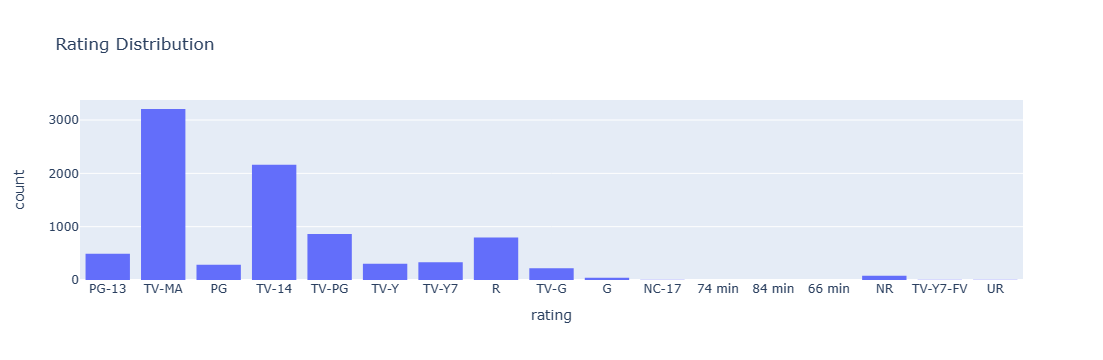

In [112]:
px.histogram(data,x='rating',title="Rating Distribution")

In [113]:
#we have drawn better insights related to the type,rating,top_countries
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [115]:
#take a simple ex. to understand lematization
from nltk.stem import WordNetLemmatizer

In [122]:
lemmatizer=WordNetLemmatizer()
lemmatizer
#take A simple word to transform 
word='working'
le=lemmatizer.lemmatize(word,pos='v')
le

'work'

In [127]:
word='better'
adj_lemma=lemmatizer.lemmatize(word,pos='a') #a for 
adv_lemma=lemmatizer.lemmatize(word,pos='r')
print(adj_lemma)
print(adv_lemma)

good
well


In [129]:
#text analysis
data['description'][1]

'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'

In [130]:
print(len(stopwords.words("english")))


179


In [167]:
from nltk.tokenize import word_tokenize
#create a fuN for 
def preprocessing(documents):
    """ Data Preprocessing for Recommendation"""
    lemmatizer=WordNetLemmatizer()
    #set  the stopwords
    stop_words=set(stopwords.words('english'))
    #create an empty list to store preprocessed documents
    preprocessed_docs=[]
    #iterate through the documents
    for doc in documents:
        #tokenize the documents,convert to lowercase and lemmatize
        tokens=word_tokenize(doc.lower())
        #lematization process below
        filtered_tokens=[lemmatizer.lemmatize(token)
                        for token in tokens
                        if token.isalpha() and token
                        not in stop_words]
        #join the filtered tokens into a preprocessed document
        preprocessed_docs.append(' '.join(filtered_tokens))
    return preprocessed_docs

In [146]:
a='codegnan'
b=' '.join(a)
b

'c o d e g n a n'

In [168]:
v=preprocessing(data['description'])
v

['father nears end life filmmaker kirsten johnson stage death inventive comical way help face inevitable',
 'crossing path party cape town teen set prove whether swimming star sister abducted birth',
 'protect family powerful drug lord skilled thief mehdi expert team robber pulled violent deadly turf war',
 'feud flirtation toilet talk go among incarcerated woman orleans justice center new orleans gritty reality series',
 'city coaching center known train india finest collegiate mind earnest unexceptional student friend navigate campus life',
 'arrival charismatic young priest brings glorious miracle ominous mystery renewed religious fervor dying town desperate believe',
 'equestria divided hero belief earth pony pegasi unicorn pal hoof heart determined prove',
 'photo shoot ghana american model slip back time becomes enslaved plantation bear witness agony ancestral past',
 'talented batch amateur baker face competition whipping best dish hope named best',
 'woman adjusting life loss c

In [169]:
#now the preprocessing we need to go for FeatureExtraction--->
vectorizer=TfidfVectorizer()
tf_idf=vectorizer.fit_transform(v)
tf_idf

<8807x16331 sparse matrix of type '<class 'numpy.float64'>'
	with 121492 stored elements in Compressed Sparse Row format>

In [170]:
tf_idf.toarray()
#print(dir('tf_idf'))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [171]:
from sklearn.metrics.pairwise import cosine_similarity

In [172]:
#calulate the cosine_similarity for above transform data
cosine_sim=cosine_similarity(tf_idf,tf_idf)
print(cosine_sim)

[[1.         0.         0.         ... 0.         0.01403953 0.03846602]
 [0.         1.         0.         ... 0.04360352 0.         0.        ]
 [0.         0.         1.         ... 0.0318149  0.         0.02181755]
 ...
 [0.         0.04360352 0.0318149  ... 1.         0.         0.        ]
 [0.01403953 0.         0.         ... 0.         1.         0.        ]
 [0.03846602 0.         0.02181755 ... 0.         0.         1.        ]]


In [ ]:
#based on the above cosine_sim we will check for the recommendation
def get_recommendation(title,
                       cosine_sim=cosine_sim,
                       num_recommendations=10):
    #convert input title to lowercase
    title=title.lower()
    if title not in data['title'].str.lower().unique():
        return f'title'{title}'not found in the data'
    idx=data[data['title'].str.lower()==title].index[0]
    print(idx)

    sim_scores=list(enumerate)
    